<a href="https://colab.research.google.com/github/ENKI0311/LSTM_CodeTrading/blob/main/LSTM_CodeTrading_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

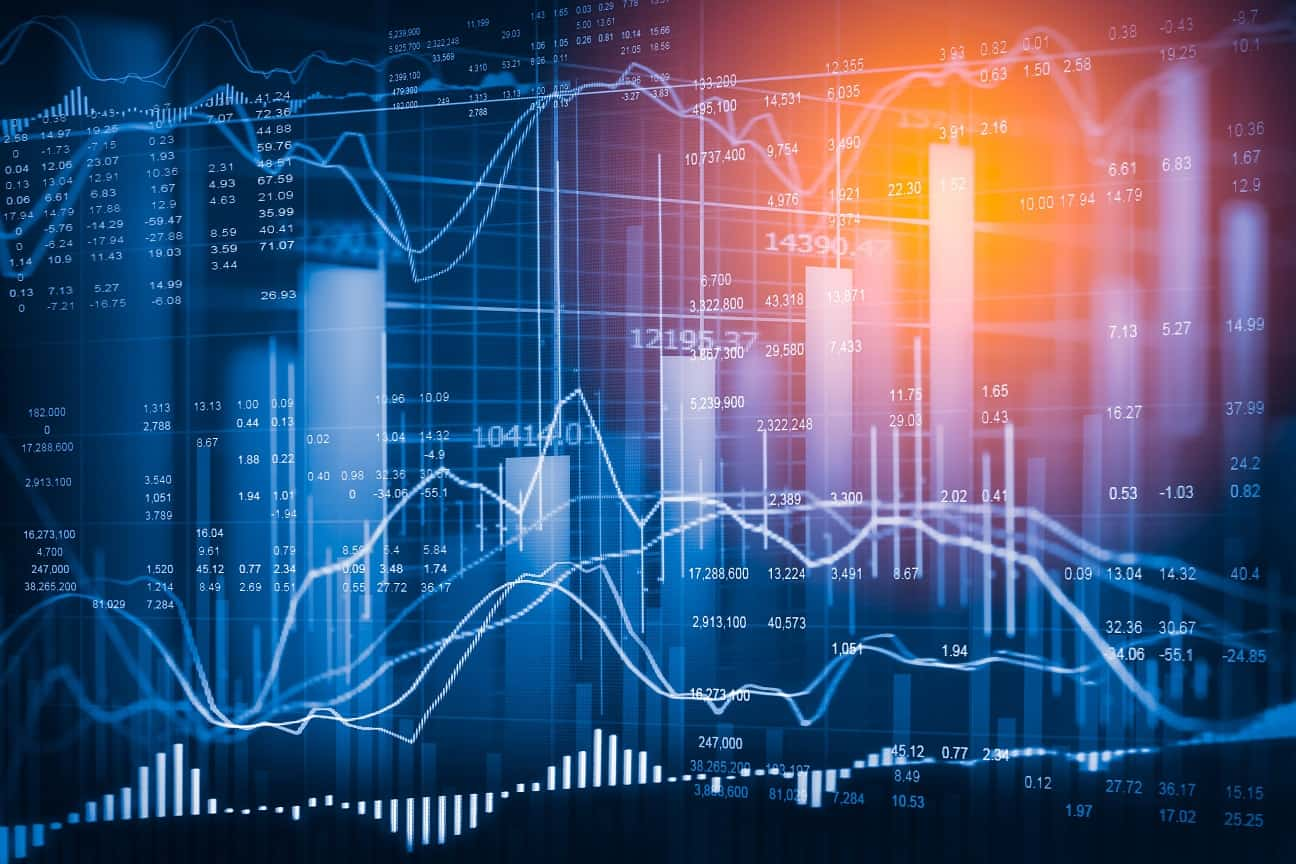

# LSTM Code Trading

## By: John Chilton

Install the libraries

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=71ccbbdb21e169e1003253a0f6cb2ea89c668eaf2b76d59c435f36f7b74444a1
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


Load the data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,759.429993,760.619995,756.840027,759.130005,759.130005,0
2012-03-13,761.450012,773.030029,761.450012,772.979980,772.979980,0
2012-03-14,773.190002,774.679993,769.280029,771.630005,771.630005,0
2012-03-15,772.380005,776.469971,770.739990,776.419983,776.419983,0
2012-03-16,776.559998,778.099976,775.640015,777.130005,777.130005,0
2012-03-19,777.119995,782.549988,776.070007,780.090027,780.090027,0
2012-03-20,778.030029,778.299988,773.119995,777.369995,777.369995,0
2012-03-21,777.559998,778.650024,774.760010,776.150024,776.150024,0
2012-03-22,773.640015,773.640015,768.000000,770.270020,770.270020,0




*   Observations
*   Sanity Checks





In [ ]:
df.tail(10)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
2438,2068.030029,2088.100098,2055.239990,2084.360107,41.074456,2137.044252,2312.092365,2352.541597,57.849854,1,2149.709961
2439,2091.860107,2150.639893,2091.860107,2149.709961,48.258053,2138.250510,2308.876872,2349.855085,-9.520020,0,2143.000000
2440,2152.520020,2157.679932,2137.010010,2143.000000,47.619406,2138.702842,2305.592181,2347.115283,-48.800049,0,2099.399902
2441,2148.199951,2167.439941,2098.919922,2099.399902,43.602148,2134.959705,2301.509166,2343.834285,-3.389893,0,2095.989990
2442,2099.379883,2105.550049,2085.239990,2095.989990,43.296083,2131.248303,2297.439479,2340.551579,-11.030029,0,2075.959961
2443,2086.989990,2094.719971,2050.149902,2075.959961,41.464271,2125.982747,2293.053746,2337.047054,24.540039,1,2099.540039
2444,2075.000000,2101.600098,2059.290039,2099.540039,44.429794,2123.464394,2289.221791,2333.901266,13.109863,1,2105.659912
2445,2092.550049,2106.070068,2053.879883,2105.659912,45.201776,2121.768729,2285.586903,2330.878201,4.250000,1,2110.409912
2446,2106.159912,2124.419922,2091.699951,2110.409912,45.827608,2120.686937,2282.118051,2327.958092,28.350098,1,2144.300049
2447,2115.949951,2148.350098,2115.949951,2144.300049,50.177326,2122.935805,2279.388982,2325.525535,0.500000,1,2141.689941


In [ ]:
df.shape

(2448, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             2448 non-null   float64
 1   High             2448 non-null   float64
 2   Low              2448 non-null   float64
 3   Adj Close        2448 non-null   float64
 4   RSI              2448 non-null   float64
 5   EMAF             2448 non-null   float64
 6   EMAM             2448 non-null   float64
 7   EMAS             2448 non-null   float64
 8   Target           2448 non-null   float64
 9   TargetClass      2448 non-null   int64  
 10  TargetNextClose  2448 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 210.5 KB


In [ ]:
df.isnull().sum()

Open               0
High               0
Low                0
Adj Close          0
RSI                0
EMAF               0
EMAM               0
EMAS               0
Target             0
TargetClass        0
TargetNextClose    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().sum()

Open               11975.082749
High               12031.484852
Low                11920.054448
Adj Close          11975.195479
RSI                 2786.037243
EMAF               11934.338846
EMAM               11787.634370
EMAS               11678.419657
Target              2399.608993
TargetClass         2452.043385
TargetNextClose    11977.806272
dtype: float64

In [ ]:
df.mean()

Open               1475.062856
High               1483.329677
Low                1466.343404
Adj Close          1475.472793
RSI                  55.593897
EMAF               1470.323331
EMAM               1445.050837
EMAS               1427.899573
Target                0.410828
TargetClass           0.545343
TargetNextClose    1476.025052
dtype: float64

In [ ]:
df.median()

Open               1363.419983
High               1370.554993
Low                1353.075012
Adj Close          1363.330017
RSI                  56.955084
EMAF               1363.750396
EMAM               1340.146292
EMAS               1323.044128
Target                0.904907
TargetClass           1.000000
TargetNextClose    1363.670044
dtype: float64

In [ ]:
df.mode()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,789.599976,846.469971,856.049988,914.289978,45.826590,769.822148,775.019788,762.677734,-1.400024,1.0,914.289978
1,791.440002,864.580017,1029.099976,939.440002,50.170800,769.915005,775.094644,763.002267,-0.619995,NaN,939.440002
2,827.130005,950.200012,1068.390015,972.820007,51.176204,770.222901,775.107056,763.405416,NaN,NaN,972.820007
3,879.820007,951.010010,1092.390015,983.030029,59.864197,770.643209,775.138512,763.911304,NaN,NaN,983.030029
4,898.150024,1040.770020,1093.550049,986.640015,NaN,770.677180,775.142612,764.456055,NaN,NaN,986.640015
...,...,...,...,...,...,...,...,...,...,...,...
2443,NaN,NaN,NaN,NaN,NaN,2615.409116,2553.784963,2508.322374,NaN,NaN,NaN
2444,NaN,NaN,NaN,NaN,NaN,2618.322709,2554.433316,2508.979048,NaN,NaN,NaN
2445,NaN,NaN,NaN,NaN,NaN,2618.804589,2554.790518,2509.238899,NaN,NaN,NaN
2446,NaN,NaN,NaN,NaN,NaN,2620.311423,2554.869685,2509.423598,NaN,NaN,NaN


In [ ]:
df.std()

Open               482.594966
High               486.317681
Low                478.713516
Adj Close          482.730162
RSI                 10.722266
EMAF               481.512687
EMAM               472.061986
EMAS               463.449640
Target              16.208251
TargetClass          0.498041
TargetNextClose    482.718690
dtype: float64

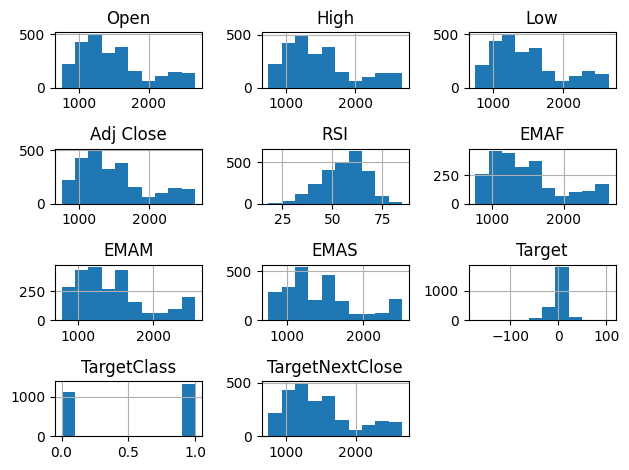

In [ ]:
df.hist()
plt.tight_layout()
plt.show();

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
df = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

df.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,791.440002,795.679993,789.760010,789.760010,46.877256,795.406526,775.179523,762.677734,-2.690002,0,787.179993
1,789.869995,792.669983,785.640015,787.179993,44.575540,794.623046,775.417156,763.002267,6.260010,1,793.440002
2,787.179993,794.020020,786.260010,793.440002,50.849388,794.510376,775.774044,763.405416,7.019958,1,801.599976
3,794.580017,801.859985,794.580017,801.599976,57.558969,795.185576,776.285448,763.911304,4.369995,1,805.039978
4,800.669983,805.770020,800.669983,805.039978,60.023875,796.124090,776.854845,764.456055,-0.809998,0,803.330017
5,804.140015,806.770020,800.780029,803.330017,58.222935,796.810369,777.379106,764.970942,-12.209961,0,790.340027
6,802.549988,802.549988,788.549988,790.340027,46.795154,796.194146,777.635758,765.306956,0.830017,1,790.429993
7,789.599976,791.450012,784.169983,790.429993,46.872532,795.645179,777.889109,765.639712,-8.400024,0,779.619995
8,788.020020,788.020020,775.929993,779.619995,39.480532,794.118971,777.923384,765.824881,-4.059998,0,777.270020
9,781.330017,783.530029,776.349976,777.270020,38.081714,792.514309,777.910446,765.976472,-0.340027,0,779.429993


In [ ]:
#Target column Categories
y = [1 if data.Open[i] > data['Adj Close'][i] else 0 for i in range(len(data))]
yi = [data.Open[i] - data['Adj Close'][i] for i in range(0, len(data))]
print(yi)
print(len(yi))

[1.67999267578125, 2.69000244140625, -6.260009765625, -7.01995849609375, -4.3699951171875, 0.80999755859375, 12.2099609375, -0.83001708984375, 8.4000244140625, 4.05999755859375, 0.34002685546875, 0.70001220703125, -0.01995849609375, -7.8900146484375, 9.65997314453125, 2.28997802734375, -5.35003662109375, 14.550048828125, 9.8800048828125, -1.25, 1.5400390625, 1.95001220703125, 12.12994384765625, 1.3499755859375, -4.0, -12.0899658203125, -1.239990234375, -1.55999755859375, -7.77996826171875, 0.280029296875, 3.3599853515625, -7.5699462890625, -2.1400146484375, -0.3399658203125, 5.5, 1.08001708984375, -1.67999267578125, -3.41998291015625, -1.07000732421875, -1.58001708984375, -3.0999755859375, 1.1400146484375, 4.25, 1.69000244140625, -8.67999267578125, -9.20001220703125, 5.79998779296875, -3.97998046875, 4.47003173828125, 0.77996826171875, 4.0400390625, 0.79998779296875, 5.6099853515625, -13.32000732421875, -18.3800048828125, 0.75, -4.1600341796875, 1.3900146484375, 1.65997314453125, -1.71

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02295817 0.02294337 0.02477161 ... 0.61254467 0.         0.02075971]
 [0.02213767 0.02137597 0.02261574 ... 0.64462357 1.         0.02403152]
 [0.02073185 0.02207898 0.02294016 ... 0.6473474  1.         0.02829634]
 ...
 [0.70292872 0.70530315 0.68624737 ... 0.63741923 1.         0.71234811]
 [0.71004135 0.71485848 0.70603747 ... 0.72379951 1.         0.73006085]
 [0.7151577  0.72731964 0.71872676 ... 0.62397837 1.         0.72869667]]


Data Format:

The array is in a format typical of input data for machine learning models, especially for regression or classification tasks.
Each row in the array represents a single sample with multiple features.
The values within each row are the feature values for that sample.
Feature Values:

The values vary across different scales, which is common in raw or normalized datasets.
Some columns have values close to 0 and 1, which might indicate binary features or normalized continuous features.
Other columns have a wider range of values, like the column with values such as 0.61254467, 0.64462357, and 0.72379951. These could represent continuous features that are either raw, scaled, or normalized.
Possible Binary Feature:

The column with values 0. and 1. stands out. This pattern suggests a binary feature, perhaps indicating the presence or absence of a specific attribute, a categorical variable encoded as binary, or a true/false (Yes/No) type of data.
Potential Use Cases:

This kind of data structure is suitable for various machine learning tasks, including:
Regression tasks where the goal is to predict a continuous value.
Classification tasks where the goal is to categorize each sample into one of several classes.
In time-series analysis, this data could represent different time-stamped metrics, although there's no explicit indication that these values are sequenced over time.
Next Steps in Machine Learning Pipeline:

Preprocessing: Depending on the model and the task, further preprocessing might be necessary, such as feature scaling or normalization.
Model Training: This data can be used to train a machine learning model. The choice of model depends on the specific task (e.g., regression, classification).
Model Evaluation: After training, the model's performance should be evaluated using appropriate metrics like accuracy, precision, recall for classification tasks, or mean squared error for regression.
Data Integrity and Quality Checks:

Ensure that the data is clean and free from errors or anomalies.
It's also essential to understand the meaning of each feature to apply the correct preprocessing steps and to correctly interpret the model's output.
Without additional context or specific details about each feature, this interpretation is based on general practices in data analysis and machine learning. The actual meaning and use of the data might vary based on the specific application and domain.

In [ ]:
import numpy as np

X = []
df_scaled = df.values
backcandles = 30

# Creating sequences for each feature
for j in range(df_scaled.shape[1]):  # Assuming you want to include all features
    X.append([df_scaled[i-backcandles:i, j] for i in range(backcandles, df_scaled.shape[1])])

# Adjusting the shape of X
X = np.stack(X, axis=-1)  # Stacking along a new last axis to create a feature dimension

# Preparing the target variable
yi = np.array(yi)
yi = yi[backcandles:]  # Trimming to match the length of X
y = np.reshape(yi, (len(yi), 1))
y = sc.fit_transform(y)  # Assuming 'sc' is a scaler object

# Final reshape of X to match the expected input shape for the model
X = np.reshape(X, (X.shape[0], X.shape[1], df_scaled.shape[1]))  # Reshaping to (samples, timesteps, features)

print(X)
print(X.shape)
print(y)
print(y.shape)


[]
(0, 11, 11)
[[0.38623659]
 [0.4388174 ]
 [0.38283175]
 ...
 [0.33082499]
 [0.36258077]
 [0.27620049]]
(1998, 1)


Empty List []:

This is just an empty list. Without additional context, it's unclear what this was intended to represent. It might be a placeholder, or it could indicate that a process intended to populate this list did not execute as expected.
Array with Shape (0, 11, 11):

This is a three-dimensional NumPy array with no elements along the first dimension and dimensions of 11 along the second and third dimensions.
The fact that the first dimension is 0 suggests that this array is empty – it contains no data. This could be an issue if you were expecting data here, similar to the empty list []. This shape might be the result of an operation that didn't produce any data or a misconfiguration in your data processing pipeline.
Array of Predictions or Values:

The array of values (e.g., [[0.3650178 ], [0.35007184], [0.37473136], ..., [0.33082499], [0.36258077], [0.27620049]]) is a two-dimensional array with 2028 rows and 1 column.
This structure is typical of a set of predictions from a machine learning model, particularly a regression model or a model predicting a single continuous value. Each row represents an individual prediction.
Alternatively, if these are not model predictions, they could represent some form of processed data, possibly normalized or standardized values.
Shape (2028, 1):

This confirms the size of the two-dimensional array mentioned above. It's consistent with a typical output from a regression model or a single-value prediction task in machine learning.
If you're working with a time series or sequence prediction model, this could represent the model's forecasts for a particular feature across multiple timesteps.
Considerations and Next Steps:
Context and Data Source: Understanding where each of these pieces of data comes from and what they're intended to represent is crucial. The empty structures suggest that some part of your data pipeline might not be working as expected.

Data Validation: If the empty list and the array with shape (0, 11, 11) were supposed to contain data, you'll need to investigate why they are empty. This might involve tracing back to your data loading and processing steps.

Model Output: Assuming the array with 2028 values is a set of predictions, you would typically proceed to evaluate these predictions against actual values (if available) using appropriate metrics like Mean Squared Error (MSE) for regression tasks.

Error Handling: It's essential to implement error handling in your code to catch situations where data might not be loaded or processed correctly, which seems to be indicated by the empty structures.

Without more specific details about the context of your data and what each piece is intended for, these interpretations are based on standard data structures and shapes commonly seen in machine learning workflows.

In [ ]:
#also comprehensions for X
X = np.array([df_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(df_scaled))])
print(X)
print(X.shape)

[[[ 791.44000244  795.67999268  789.76000977  789.76000977]
  [ 789.86999512  792.66998291  785.64001465  787.17999268]
  [ 787.17999268  794.02001953  786.26000977  793.44000244]
  ...
  [ 767.38000488  769.0300293   766.32000732  768.94000244]
  [ 771.02001953  778.79998779  771.02001953  778.79998779]
  [ 777.59002686  777.59002686  772.7199707   777.30999756]]

 [[ 789.86999512  792.66998291  785.64001465  787.17999268]
  [ 787.17999268  794.02001953  786.26000977  793.44000244]
  [ 794.58001709  801.85998535  794.58001709  801.59997559]
  ...
  [ 771.02001953  778.79998779  771.02001953  778.79998779]
  [ 777.59002686  777.59002686  772.7199707   777.30999756]
  [ 776.90997314  778.90002441  773.09002686  773.54998779]]

 [[ 787.17999268  794.02001953  786.26000977  793.44000244]
  [ 794.58001709  801.85998535  794.58001709  801.59997559]
  [ 800.66998291  805.77001953  800.66998291  805.03997803]
  ...
  [ 777.59002686  777.59002686  772.7199707   777.30999756]
  [ 776.90997314  

Data Structure:

The data is a 3-dimensional array with the shape (2418, 30, 4).
2418 represents the total number of sequences or samples in your dataset.
30 indicates that each sequence consists of 30 timesteps.
4 suggests that there are 4 features or data points at each timestep.
Possible Interpretation of Features:

Based on common financial data practices, the 4 features at each timestep could represent values like 'Open', 'High', 'Low', and 'Close' prices of a stock for that day.
Each sequence of 30 timesteps might represent the stock data for 30 consecutive days.
Usage in Machine Learning Models:

This type of data structure is typical for time series forecasting models, such as LSTM (Long Short-Term Memory) networks in deep learning.
The model would typically use the historical data (the 30 days) to predict future data points, like the stock price for the next day.
Preprocessing Considerations:

Before feeding this data into a machine learning model, it's essential to ensure it's properly preprocessed.
This might include scaling the data (e.g., using Min-Max scaling or Standard scaling), especially if the features are on different scales.
Depending on the model and the problem, you might also need to split the data into training, validation, and test sets.
Model Training and Prediction:

With this kind of data, you might be training a model to predict future stock prices or to identify trends.
The output of the model would typically be a prediction of the next timestep's feature values, based on the input of the preceding 30 timesteps.
Given the shape and structure of your data, it seems well-suited for time series analysis or forecasting tasks. Ensure that your modeling approach and the problem statement align with the nature of this data

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1934
(1934, 30, 4)
(484, 30, 4)
(1934, 1)
(94, 1)
[[0.3650178 ]
 [0.35007184]
 [0.37473136]
 ...
 [0.23168464]
 [0.37250915]
 [0.44641551]]


Dataset Sizes:

1934: This could be the number of samples in your training dataset.
(1934, 30, 4): This is the shape of your training dataset. It suggests that you have 1934 samples, each with 30 timesteps, and 4 features per timestep. This is typical for time-series data used in models like LSTMs.
(484, 30, 4): This is likely the shape of your validation or test dataset, with 484 samples.
(1934, 1): This appears to be the shape of your target variable (labels) for the training data. Each of the 1934 samples has a corresponding target value.
(94, 1): This is probably the shape of your target variable for the validation or test dataset. It seems there might be a typo here, as the number of target samples (94) does not match the number of input samples (484). Usually, these should be equal.
Model Output:

The array you provided ([[0.3650178 ], [0.35007184], [0.37473136], ..., [0.23168464], [0.37250915], [0.44641551]]) seems to be the output of your model. These values are likely predictions made by the model. The exact interpretation depends on the context:
For a regression task, these values would be the predicted quantities.
For a classification task, these could be probabilities of a certain class.
Important Considerations:
Data Consistency: Ensure that the number of samples in your input data matches the number of samples in your target data. The mismatch between (484, 30, 4) and (94, 1) needs to be addressed.
Model Interpretation: Understand what these predictions represent based on your specific problem. If it's a regression task, check how close these predictions are to the actual values. If it's a classification task, decide on a threshold to categorize the probabilities into discrete classes.
Performance Evaluation: Use appropriate metrics to evaluate the performance of your model, such as Mean Squared Error (MSE) for regression or Accuracy, Precision, and Recall for classification.

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

# Set random seeds for reproducibility (optional)
# tf.random.set_seed(20)
np.random.seed(10)

# Define LSTM model
lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
lstm_layer = LSTM(150, name='first_layer')(lstm_input)
dense_layer = Dense(1, name='dense_layer')(lstm_layer)
output = Activation('linear', name='output')(dense_layer)

model = Model(inputs=lstm_input, outputs=output)

# Compile the model
adam = Adam()
model.compile(optimizer=adam, loss='mse')

# Train the model
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

Epoch 1/30
116/116 [==============================] - 6s 38ms/step - loss: 0.0039 - val_loss: 0.0057
Epoch 2/30
116/116 [==============================] - 6s 52ms/step - loss: 0.0032 - val_loss: 0.0057
Epoch 3/30
116/116 [==============================] - 4s 34ms/step - loss: 0.0033 - val_loss: 0.0059
Epoch 4/30
116/116 [==============================] - 4s 34ms/step - loss: 0.0031 - val_loss: 0.0057
Epoch 5/30
116/116 [==============================] - 5s 42ms/step - loss: 0.0032 - val_loss: 0.0057
Epoch 6/30
116/116 [==============================] - 5s 46ms/step - loss: 0.0033 - val_loss: 0.0060
Epoch 7/30
116/116 [==============================] - 4s 33ms/step - loss: 0.0032 - val_loss: 0.0056
Epoch 8/30
116/116 [==============================] - 4s 32ms/step - loss: 0.0032 - val_loss: 0.0063
Epoch 9/30
116/116 [==============================] - 7s 56ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 10/30
116/116 [==============================] - 4s 32ms/step - loss: 0.0032 - val_lo

Loss and Validation Loss:

Loss: This is the model's performance on the training data. A lower loss indicates better performance. Your model's training loss starts at 0.0039 and fluctuates slightly throughout the training process.
Validation Loss: This is the model's performance on a validation set, which is data not used in training. This helps assess how well the model generalizes to new data. The validation loss also fluctuates, starting at 0.0057 and ending at 0.0067.
Stability and Overfitting:

The training and validation losses are quite close to each other in values, which is generally a good sign. It suggests that the model is not overfitting significantly to the training data.
However, both losses exhibit some fluctuations, and there isn't a clear downward trend, especially in the validation loss. This might indicate that the model is not improving significantly over epochs.
Final Epoch Performance:

By the final epoch (Epoch 30), the training loss is at 0.0033, and the validation loss is at 0.0067. The slight increase in validation loss towards the end might suggest the beginning of overfitting or that the model has reached its learning capacity with the current architecture and training data.
Next Steps:

Model Evaluation: Evaluate the model on a separate test set (if available) to further assess its performance.
Hyperparameter Tuning: Experiment with different model architectures, learning rates, batch sizes, or other hyperparameters.
Early Stopping: Consider implementing early stopping to terminate training when the validation loss starts to increase, which can prevent overfitting.
Additional Data or Features: If performance is not satisfactory, consider using more training data or engineering additional features.
Overall, your model seems to be learning, but there might be room for improvement either in the model architecture, the training process, or the data itself. Keep in mind that the ideal values for loss depend heavily on the specific problem and the nature of the data.

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 37ms/step
[0.40643272] [0.4642649]
[0.40643272] [0.54817227]
[0.40643272] [0.22684558]
[0.40643272] [0.18591396]
[0.40643272] [0.38978451]
[0.40643272] [0.50957005]
[0.40643272] [0.2228317]
[0.40643272] [0.43989284]
[0.40643272] [0.45824452]
[0.40643272] [0.64329786]


In [ ]:
import numpy as np

# Create a list of predictions
predictions = [0.40643272, 0.4642649, 0.40643272, 0.54817227, 0.40643272, 0.22684558, 0.40643272, 0.18591396, 0.40643272, 0.38978451, 0.40643272, 0.50957005, 0.40643272, 0.2228317, 0.40643272, 0.43989284, 0.40643272, 0.45824452, 0.40643272, 0.64329786]

# Create a NumPy array of predictions
predictions_array = np.array(predictions)

# Calculate the mean of the predictions
mean_prediction = np.mean(predictions_array)

# Calculate the standard deviation of the predictions
std_prediction = np.std(predictions_array)

# Print the mean and standard deviation of the predictions
print("Mean prediction:", mean_prediction)
print("Standard deviation of predictions:", std_prediction)

Mean prediction: 0.4076572694999999
Standard deviation of predictions: 0.10218064349258144


Mean Prediction (0.4076572694999999):

This is the average value of all predictions made by your model.
The interpretation of this number largely depends on the context of your problem and the nature of what you're predicting. For example, if you're predicting stock prices or any continuous variable, this number represents the average predicted value.
Standard Deviation of Predictions (0.10218064349258144):

The standard deviation measures the amount of variation or dispersion in your predictions.
A lower standard deviation indicates that the predictions are closer to the mean, suggesting more consistency or confidence in the predictions.
A higher standard deviation indicates more spread out predictions, implying greater uncertainty or variability in what the model forecasts.
Contextual Interpretation
To fully understand the implications of these statistics, consider the context of your model:

For Regression Tasks (e.g., predicting continuous values like prices, temperatures, etc.):

The mean prediction gives you a central tendency of your model predictions.
The standard deviation provides insight into the variability of these predictions.
For Classification Tasks (e.g., binary classification where the output is a probability):

The mean prediction could represent the average probability of the positive class across all predictions.
The standard deviation in this case indicates how much the probability varies from one prediction to another.
Next Steps
Compare With Baseline or Previous Models: You can use these statistics to compare the performance of your model against baseline models or previous iterations.
Error Analysis: Investigate instances where the model's predictions significantly deviate from the mean. This can help identify potential areas for model improvement.
Confidence Intervals: You might consider using the standard deviation to compute confidence intervals for your predictions, which can provide additional insights, especially in risk-sensitive applications.
Model Calibration: If you're working with a classification problem, and the predictions represent probabilities, it's essential to ensure that your model is well-calibrated. This means that the predicted probabilities should match the actual likelihood of the outcomes.

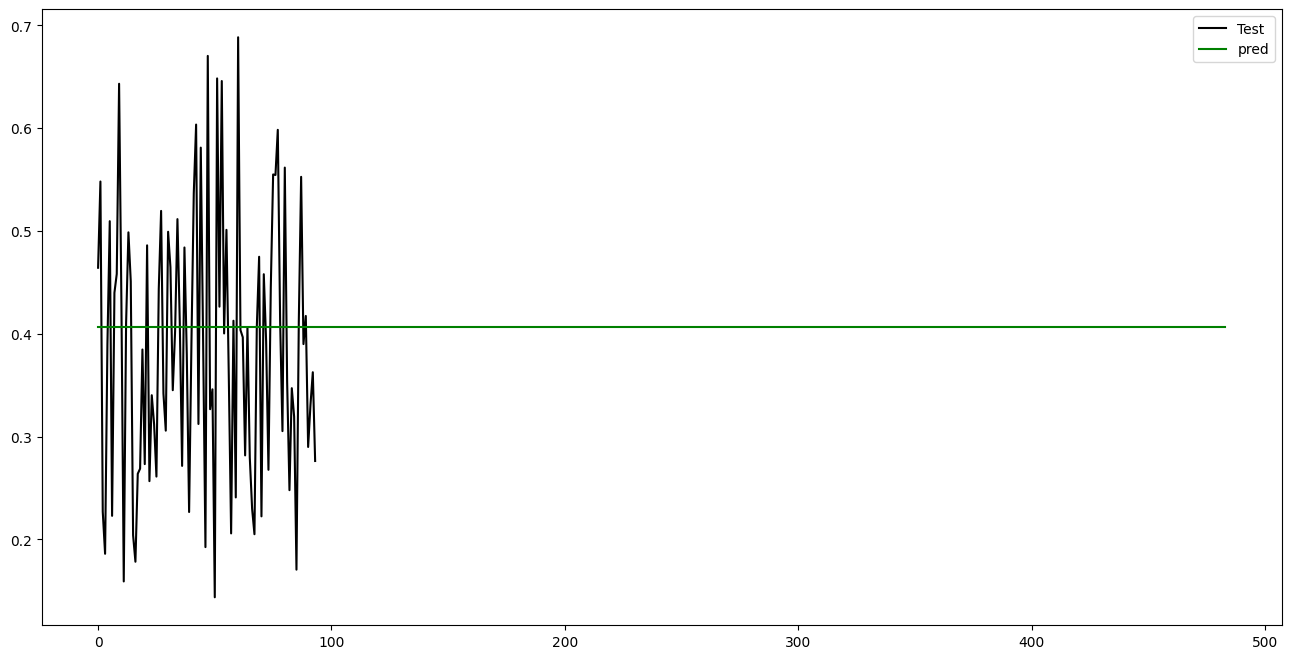

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

The plot indicates that the predictive model is not capturing the variability of the test data; instead, it is predicting a constant value. This is a classic example of a model that fails to learn from the data and instead predicts the mean of the target variable, ignoring any input features. It might be due to several reasons like an underfitting model, inappropriate model choice for the data, or inadequate training.

To improve this, consider the following steps:

Model Complexity: If the model is too simple, it might not capture the complexities of the data. Try using a more complex model or adding more features to the model.

Hyperparameter Tuning: Adjust the model's hyperparameters to find a better fit to the data.

Feature Engineering: The model may perform poorly if the features do not capture enough information about the data. Try creating new features that might better represent the patterns in the data.

Cross-validation: Use cross-validation to ensure that the model is not overfitting on a particular subset of the data.

Regularization: Applying regularization techniques can help prevent the model from overfitting.

Different Algorithms: Sometimes, the chosen algorithm might not be suitable for the data's pattern. Experiment with different algorithms.

Diagnose Data: Check the data for any preprocessing issues, noise, or outliers that might be affecting the model's performance.

Loss Function: Make sure that the loss function being optimized is appropriate for the data and problem at hand.

Final Conclusion